In [81]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))
from tqdm import tqdm
tqdm.pandas()


In [4]:
train_df=pd.read_csv('./Data/train.csv')

In [75]:
train_df

,id,y,var1,var2,var3,t1_2001,t2_2001,t3_2001,t4_2001,t5_2001,...,t106_9170,t107_9170,t108_9170,t109_9170,t110_9170,t111_9170,t112_9170,t113_9170,t114_9170,t115_9170
0,1,113.0,19,A,A,-0.140642,-0.388162,-0.574181,-0.583770,-0.376220,...,0.584130,-0.100278,-0.846640,-1.461938,-1.801008,-1.804553,-1.500023,-0.980571,-0.377526,0.168243
1,2,119.0,14,C,A,0.023754,-0.105455,-0.245025,-0.310670,-0.249384,...,-3.024336,-2.480266,-1.118005,0.181451,0.726820,0.401501,-0.356744,-0.913405,-0.854943,-0.193468
2,3,109.0,13,A,A,0.180818,0.135004,0.001879,-0.134548,-0.185928,...,-0.156851,-0.262902,-0.668436,-1.172372,-1.387328,-1.016077,-0.103130,0.935900,1.550512,1.405350
3,4,110.0,18,A,A,-0.234780,-0.094543,0.193084,0.508519,0.668783,...,-1.358540,-0.028478,0.535346,-0.116384,-1.542395,-2.486781,-1.631185,1.481241,6.015514,10.233163
4,5,123.0,32,A,A,-0.130934,-0.360313,-0.547045,-0.603495,-0.508025,...,-0.825535,-0.392556,0.156361,0.567142,0.756362,0.809336,0.844580,0.876423,0.801686,0.524566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,794,110.0,41,A,A,0.059091,0.102927,0.167974,0.235793,0.242588,...,-0.057536,-0.750600,-1.422304,-1.807741,-1.349442,0.350016,2.341956,2.732083,0.976598,-1.039106
596,795,120.0,64,A,A,-0.009643,-0.052258,0.011368,0.121682,0.143449,...,-0.811138,-0.834139,-0.658424,-0.346113,-0.197853,-0.308410,-0.359883,-0.070181,0.296186,0.199696
597,797,96.0,27,A,A,-0.019310,0.082953,0.222301,0.374440,0.447602,...,1.337280,1.089598,1.323202,1.535013,1.084823,0.206892,-0.139006,0.299608,0.321211,-1.356280
598,798,118.0,29,C,A,0.554973,0.227389,-0.422503,-0.088061,0.210051,...,1.632523,2.674116,1.483660,1.520353,-0.672479,-3.975402,-2.972622,0.292423,1.244024,1.499407


In [6]:
train_df.head()

,id,y,var1,var2,var3,t1_2001,t2_2001,t3_2001,t4_2001,t5_2001,...,t106_9170,t107_9170,t108_9170,t109_9170,t110_9170,t111_9170,t112_9170,t113_9170,t114_9170,t115_9170
0,1,113.0,19,A,A,-0.140642,-0.388162,-0.574181,-0.583770,-0.376220,...,0.584130,-0.100278,-0.846640,-1.461938,-1.801008,-1.804553,-1.500023,-0.980571,-0.377526,0.168243
1,2,119.0,14,C,A,0.023754,-0.105455,-0.245025,-0.310670,-0.249384,...,-3.024336,-2.480266,-1.118005,0.181451,0.726820,0.401501,-0.356744,-0.913405,-0.854943,-0.193468
2,3,109.0,13,A,A,0.180818,0.135004,0.001879,-0.134548,-0.185928,...,-0.156851,-0.262902,-0.668436,-1.172372,-1.387328,-1.016077,-0.103130,0.935900,1.550512,1.405350
3,4,110.0,18,A,A,-0.234780,-0.094543,0.193084,0.508519,0.668783,...,-1.358540,-0.028478,0.535346,-0.116384,-1.542395,-2.486781,-1.631185,1.481241,6.015514,10.233163
4,5,123.0,32,A,A,-0.130934,-0.360313,-0.547045,-0.603495,-0.508025,...,-0.825535,-0.392556,0.156361,0.567142,0.756362,0.809336,0.844580,0.876423,0.801686,0.524566


In [7]:
train_df.shape

(600, 13345)

In [8]:
train_df.iloc[1,5:120]

t1_2001      0.023754
t2_2001     -0.105455
t3_2001     -0.245025
t4_2001      -0.31067
t5_2001     -0.249384
               ...   
t111_2001     0.13699
t112_2001    0.074068
t113_2001   -0.057136
t114_2001   -0.165585
t115_2001    -0.14584
Name: 1, Length: 115, dtype: object

In [9]:
m = train_df.iloc[:,5:].values.copy()
m

array([[-0.140642  , -0.38816199, -0.57418102, ..., -0.98057097,
        -0.37752599,  0.16824301],
       [ 0.023754  , -0.105455  , -0.24502499, ..., -0.913405  ,
        -0.85494298, -0.193468  ],
       [ 0.18081801,  0.135004  ,  0.001879  , ...,  0.93589997,
         1.55051196,  1.40534997],
       ...,
       [-0.01931   ,  0.082953  ,  0.22230101, ...,  0.29960799,
         0.32121101, -1.35627997],
       [ 0.55497301,  0.22738899, -0.42250299, ...,  0.29242301,
         1.24402404,  1.49940705],
       [ 0.79911   ,  0.739779  , -0.33309701, ...,  0.684452  ,
         0.50884402, -0.569821  ]])

In [13]:
m.shape

(600, 13340)

In [11]:
c = np.array(train_df.columns)[5:]

In [12]:
c.reshape(116, 115)

array([['t1_2001', 't2_2001', 't3_2001', ..., 't113_2001', 't114_2001',
        't115_2001'],
       ['t1_2002', 't2_2002', 't3_2002', ..., 't113_2002', 't114_2002',
        't115_2002'],
       ['t1_2101', 't2_2101', 't3_2101', ..., 't113_2101', 't114_2101',
        't115_2101'],
       ...,
       ['t1_9150', 't2_9150', 't3_9150', ..., 't113_9150', 't114_9150',
        't115_9150'],
       ['t1_9160', 't2_9160', 't3_9160', ..., 't113_9160', 't114_9160',
        't115_9160'],
       ['t1_9170', 't2_9170', 't3_9170', ..., 't113_9170', 't114_9170',
        't115_9170']], dtype=object)

In [14]:
brain_0 = m.reshape((600, 116, 115))[0]
corr_0 = np.corrcoef(brain_0)

C:\Users\Nicola\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Nicola\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


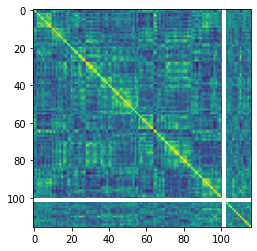

In [15]:
plt.imshow(corr_0)

In [18]:
corr_0[np.triu_indices(corr_0.shape[0], 1)]


array([ 0.32040781, -0.15642078, -0.11576635, ...,  0.28278431,
       -0.05572692,  0.14437131])

In [19]:
corr_0

array([[ 1.00000000e+00,  3.20407809e-01, -1.56420778e-01, ...,
         2.21418887e-01,  1.10240596e-02, -8.30356439e-02],
       [ 3.20407809e-01,  1.00000000e+00, -4.21838268e-01, ...,
         3.38036901e-01,  1.27579106e-01, -5.06771375e-02],
       [-1.56420778e-01, -4.21838268e-01,  1.00000000e+00, ...,
         8.55581757e-04,  7.17112846e-03,  9.00611625e-02],
       ...,
       [ 2.21418887e-01,  3.38036901e-01,  8.55581757e-04, ...,
         1.00000000e+00,  2.82784305e-01, -5.57269229e-02],
       [ 1.10240596e-02,  1.27579106e-01,  7.17112846e-03, ...,
         2.82784305e-01,  1.00000000e+00,  1.44371308e-01],
       [-8.30356439e-02, -5.06771375e-02,  9.00611625e-02, ...,
        -5.57269229e-02,  1.44371308e-01,  1.00000000e+00]])

<AxesSubplot:>

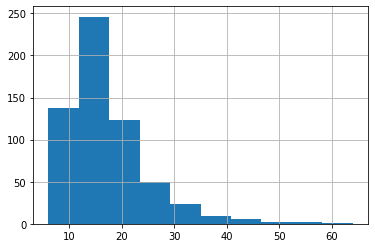

In [21]:
train_df['var1'].hist()

In [24]:
train_df['var2'].unique()

array(['A', 'C'], dtype=object)

In [25]:
train_df['var3'].unique()

array(['A', 'C'], dtype=object)

In [54]:
columns=[f'Roi{i}-Roi{j}'  for i in range(1,116) for j in range (i+1,117) ]

In [55]:
columns=[]
for i in range(1,116):
    for j in range(i+1,117):
        columns.append(f'ROI{i}-ROI{j}')


In [56]:
len(columns)

6670

In [66]:
new_df=pd.DataFrame(columns=columns)

In [71]:
new_df[columns].loc[0]=corr_0[np.triu_indices(corr_0.shape[0], 1)]

In [93]:
def get_corr(row):
    brain = np.array(row[5:])
    brain = brain.reshape((116, 115)).astype(float)
    corr = np.corrcoef(brain)
    flat = corr[np.triu_indices(corr.shape[0], 1)]
    return flat.tolist()


In [94]:
corr=train_df.progress_apply(get_corr,axis=1)

  0%|          | 1/600 [00:00<08:57,  1.11it/s]C:\Users\Nicola\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Nicola\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|██████████| 600/600 [00:11<00:00, 50.43it/s]


In [95]:
corr

0      [0.3204078089190088, -0.1564207776373913, -0.1...
1      [0.38640553974197744, 0.08416444552281542, -0....
2      [0.8099580502989564, 0.096828280445787, -0.012...
3      [0.37107279622110995, 0.3404161117893193, 0.16...
4      [0.23880837348517392, -0.07554156894349114, -0...
                             ...                        
595    [0.23970367997893388, 0.3340746290444264, -0.1...
596    [0.08208669630042678, 0.10632223238564975, -0....
597    [0.550362696804037, -0.17362307476531813, -0.0...
598    [0.3024186459452679, 0.042841612807987345, -0....
599    [0.2971240378391455, 0.07564588210997626, -0.3...
Length: 600, dtype: object

In [106]:
new_df=pd.DataFrame(np.array(corr.values.tolist()),columns=columns)

In [107]:
new_df

,ROI1-ROI2,ROI1-ROI3,ROI1-ROI4,ROI1-ROI5,ROI1-ROI6,ROI1-ROI7,ROI1-ROI8,ROI1-ROI9,ROI1-ROI10,ROI1-ROI11,...,ROI112-ROI113,ROI112-ROI114,ROI112-ROI115,ROI112-ROI116,ROI113-ROI114,ROI113-ROI115,ROI113-ROI116,ROI114-ROI115,ROI114-ROI116,ROI115-ROI116
0,0.320408,-0.156421,-0.115766,-0.306091,0.034975,-0.147885,-0.228411,-0.237148,0.020136,0.445899,...,0.006686,-0.285579,-0.072048,0.411215,0.322524,0.208173,-0.071341,0.282784,-0.055727,0.144371
1,0.386406,0.084164,-0.226632,-0.136301,-0.428097,-0.126119,-0.057845,-0.122750,-0.262477,0.594780,...,0.736991,0.147084,-0.159465,0.264405,0.006974,0.009238,0.266661,0.047870,0.112745,0.142081
2,0.809958,0.096828,-0.012295,-0.658145,-0.565232,0.436640,0.163701,-0.528475,-0.458596,0.313225,...,0.200037,0.393775,-0.085829,0.266476,0.340162,-0.142864,0.342046,0.374683,0.281569,-0.166943
3,0.371073,0.340416,0.165785,0.319523,0.071653,-0.006067,0.102873,0.247239,0.153692,0.145438,...,0.711573,0.449607,-0.101063,0.494471,0.630120,0.089310,0.583527,0.391849,0.529610,0.202928
4,0.238808,-0.075542,-0.312048,0.343195,-0.017375,0.279959,-0.206112,0.266237,-0.035437,0.385538,...,0.464747,0.110613,0.242850,0.180382,0.264813,0.369938,0.449401,-0.011589,0.637432,0.323892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.239704,0.334075,-0.133219,0.396904,0.218766,0.401353,-0.211222,0.330301,0.118898,0.499315,...,0.868837,0.570910,0.411275,0.662582,0.576929,0.390116,0.636213,0.414633,0.584703,0.823124
596,0.082087,0.106322,-0.234501,-0.227719,-0.221337,0.428577,-0.541010,0.058470,-0.258668,0.710444,...,0.192933,-0.112865,0.101323,0.343547,0.358325,0.412704,0.412598,0.035520,-0.126774,0.412996
597,0.550363,-0.173623,-0.087052,-0.076264,-0.334513,0.005763,-0.164106,-0.227619,-0.378778,0.688334,...,0.673816,0.309224,0.328117,0.451602,0.389896,0.261399,0.427783,0.504431,0.574561,0.499287
598,0.302419,0.042842,-0.557081,-0.029869,-0.165823,0.216248,-0.262268,0.092553,-0.006392,0.256167,...,0.168198,0.348409,-0.134313,0.081805,0.124225,-0.034212,-0.042134,0.136920,0.025787,-0.288578


In [108]:
new_df=new_df.fillna(0)

In [109]:
new_df['var1']=train_df['var1']

In [112]:
new_df['y']=train_df['y']

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [111]:
reg = LinearRegression()

In [114]:
X_train, X_test, y_train, y_test = train_test_split(new_df.drop(columns='y'), new_df['y'], test_size=0.33, random_state=42)

In [115]:
reg.fit(X_train,y_train)

LinearRegression()

In [116]:
reg.score(X_train, y_train)

1.0

In [117]:
y_pred=reg.predict(X_test)

In [ ]:
reg.score(X_train, y_train)

In [118]:
from sklearn.metrics import mean_squared_error

In [119]:
mean_squared_error(y_test, y_pred)

260.5447172238136

In [120]:
from sklearn.svm import SVR

In [145]:
svr_reg=SVR(C=1.0, epsilon=0.2,degree=1,kernel='poly')

In [146]:
svr_reg.fit(X_train,y_train)

SVR(degree=1, epsilon=0.2, kernel='poly')

In [147]:
y_pred=svr_reg.predict(X_test)

In [148]:
mean_squared_error(y_test, y_pred)

226.45088686641427

In [150]:
test_df=pd.read_csv('./Data/test.csv')

In [152]:
test_df

,id,var1,var2,var3,t1_2001,t2_2001,t3_2001,t4_2001,t5_2001,t6_2001,...,t106_9170,t107_9170,t108_9170,t109_9170,t110_9170,t111_9170,t112_9170,t113_9170,t114_9170,t115_9170
0,17,32,A,A,-0.350440,-0.222368,0.023356,0.243820,0.307884,0.181462,...,-0.249206,-0.299956,-0.230605,-0.002176,0.307232,0.574038,0.719488,0.739103,0.657216,0.466077
1,19,11,C,A,-0.637826,-0.626851,-0.360784,0.030366,0.336757,0.405507,...,0.747080,1.451542,1.888522,1.843617,1.353949,0.721757,0.341038,0.461075,1.052172,1.853388
2,25,17,A,C,-0.012941,-0.104797,-0.236863,-0.323248,-0.289526,-0.127867,...,-2.263840,-2.082246,-1.299818,-0.087112,1.200546,2.217524,2.777598,2.863644,2.528300,1.804936
3,32,17,A,C,0.090513,0.210141,0.258353,0.176808,-0.021250,-0.246477,...,-2.662342,-1.246634,0.756969,2.115026,2.007031,0.606600,-1.034530,-1.731524,-1.012911,0.541681
4,33,16,A,C,0.020757,0.004422,0.048168,0.217449,0.499191,0.774152,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,777,20,A,C,0.196767,0.279578,0.269504,0.142366,-0.050581,-0.192273,...,1.501500,0.315651,-0.438466,-0.390447,0.203565,1.092143,1.984272,2.303799,1.587597,0.184648
195,783,24,A,C,0.166928,0.062544,-0.064816,-0.223924,-0.397589,-0.477872,...,0.998999,2.150780,1.765160,0.167519,-1.398137,-2.035133,-1.780128,-1.156148,-0.511489,0.100604
196,784,24,A,C,0.467909,0.601598,0.466428,0.064870,-0.453154,-0.874220,...,4.963199,1.800244,-2.997877,-5.256964,-2.305884,3.395893,5.967640,2.081252,-5.207866,-9.263192
197,792,29,C,C,0.158687,0.187958,0.187666,0.168700,0.137513,0.109296,...,-2.660509,-1.084989,0.932748,2.014907,1.678764,0.401733,-0.877058,-1.297012,-0.560106,0.733061
